# Train Interspeech

## Data

In [1]:
import pandas as pd

In [2]:
balanced = False

In [3]:
preprocessed = False

In [4]:
# import pandas as pd

# # Cargar el CSV para male
# # data = pd.read_csv('data/data_male.csv')
# data = pd.read_csv('data/balanced_pseudo_male.csv')


# print(len(data))
# # Eliminar filas con valores nulos solo en la columna 'text'
# data = data.dropna(subset=['text'])
# #data.to_csv('data/data_male.csv', index=False)
# print(len(data))
# data.head()

In [4]:
# Cargar los CSV
df1 = pd.read_csv("data/balanced_pseudo_male_todas_emociones_reducido.csv")  # Primer CSV
df2 = pd.read_csv("data/balanced_pseudo_male.csv")  # Segundo CSV

# Unir los DataFrames por la columna "FileName", seleccionando solo "FileName" y "text" del segundo CSV
data = df1.merge(df2[['FileName', 'text']], on="FileName", how="left")

print(len(data))
# Eliminar filas con valores nulos solo en la columna 'text'
data = data.dropna(subset=['text'])
#data.to_csv('data/data_male.csv', index=False)
print(len(data))
data.head()

37247
37247


,FileName,worker,primary_emotion,EmoClass,EmoNum,WorkerNum,NewPartition,text
0,MSP-PODCAST_0003_0085,WORKER00003059,Sad,S,3,3059,Evaluation,a lot of support from us liberty people and th...
1,MSP-PODCAST_0003_0085,WORKER00003061,Contempt,C,4,3061,Evaluation,a lot of support from us liberty people and th...
2,MSP-PODCAST_0003_0085,WORKER00001538,Neutral,N,0,1538,Evaluation,a lot of support from us liberty people and th...
3,MSP-PODCAST_0003_0085,WORKER00000525,Sad,S,3,525,Evaluation,a lot of support from us liberty people and th...
4,MSP-PODCAST_0003_0085,WORKER00002646,Neutral,N,0,2646,Evaluation,a lot of support from us liberty people and th...


In [5]:
if balanced:
    # Paso 1: Determinar el tamaño mínimo entre las clases
    min_count = data['PseudoEmo'].value_counts().min()

    # Paso 2: Submuestrear cada clase
    data = data.groupby('PseudoEmo').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

    # Paso 3: Verificar el balance
    print(data['PseudoEmo'].value_counts())
    print(len(data))

    #data.to_csv('data/balanced_pseudo_male.csv', index=False)


In [6]:
# Filtrar los datos en tres conjuntos basados en la columna 'Split_Set'
train_df = data.loc[data['NewPartition'] == 'Train']
dev_df = data.loc[data['NewPartition'] == 'Evaluation']
test_df = data.loc[data['NewPartition'] == 'Test']

# Verifica las primeras filas de cada conjunto
print("Conjunto Train:")
print(train_df.head())

print("Conjunto Development:")
print(dev_df.head())

print("Conjunto Test:")
print(test_df.head())

Conjunto Train:
                FileName          worker primary_emotion EmoClass  EmoNum  \
5  MSP-PODCAST_0003_0106  WORKER00001494             Sad        S       3   
6  MSP-PODCAST_0003_0106  WORKER00001970             Sad        S       3   
7  MSP-PODCAST_0003_0106  WORKER00003023         Neutral        N       0   
8  MSP-PODCAST_0003_0106  WORKER00003024             Sad        S       3   
9  MSP-PODCAST_0003_0106  WORKER00002654         Neutral        N       0   

   WorkerNum NewPartition                                               text  
5       1494        Train  i know, and it's so difficult for people to le...  
6       1970        Train  i know, and it's so difficult for people to le...  
7       3023        Train  i know, and it's so difficult for people to le...  
8       3024        Train  i know, and it's so difficult for people to le...  
9       2654        Train  i know, and it's so difficult for people to le...  
Conjunto Development:
                FileName 

In [6]:
# # Establecer la semilla para garantizar reproducibilidad
# seed = 42

# # Seleccionar aleatoriamente las primeras N filas del conjunto de entrenamiento
# train_df = train_df.sample(n=1000, random_state=seed)

# # Seleccionar aleatoriamente las primeras N filas del conjunto de desarrollo
# dev_df = dev_df.sample(n=250, random_state=seed)

In [7]:
id2label = {
        0: 'N',  # Neutral
        1: 'H',  # Happy
        2: 'A',  # Angry
        3: 'S',  # Sad
        4: 'C',  # Contempt
        5: 'U',  # Surprise
        6: 'D',  # Disgust
        7: 'F',  # Fear
        8: 'O'   # Other
    }
label2id = {
        'N': 0,  # Neutral
        'H': 1,  # Happy
        'A': 2,  # Angry
        'S': 3 , # Sad
        'C': 4,  # Contempt
        'U': 5,  # Surprise
        'D': 6,  # Disgust
        'F': 7,  # Fear
        'O': 8   # Other
    }

num_labels = len(id2label.keys())
col_emo = "EmoNum" # "PseudoEmoNum"

print(f"{id2label=}")
print(f"{label2id=}")
print(f"{num_labels=}")

id2label={0: 'N', 1: 'H', 2: 'A', 3: 'S', 4: 'C', 5: 'U', 6: 'D', 7: 'F', 8: 'O'}
label2id={'N': 0, 'H': 1, 'A': 2, 'S': 3, 'C': 4, 'U': 5, 'D': 6, 'F': 7, 'O': 8}
num_labels=9


In [8]:
# Convertir EmoClass a valores numéricos si es necesario
train_df[col_emo] = train_df[col_emo].astype(int)
dev_df[col_emo] = dev_df[col_emo].astype(int)
test_df[col_emo] = test_df[col_emo].astype(int)

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_4658/2809703481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col_emo] = train_df[col_emo].astype(int)
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_4658/2809703481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df[col_emo] = dev_df[col_emo].astype(int)


In [19]:
from datasets import Dataset
from transformers import AutoTokenizer


if preprocessed == False:
    # Modelo
    model_ckpt = "distilbert-base-uncased"
    # model_ckpt = "distilroberta-base"

    # Cargar el tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

    # Función para tokenizar los datos
    def tokenize_function(examples):
        # Verificar que estamos pasando una lista de textos
        texts = examples['text']
        return tokenizer(texts, padding="max_length", truncation=True)

    # Asegurarse de que 'train_df' y 'dev_df' son objetos Dataset de Hugging Face
    train_dataset = Dataset.from_pandas(train_df)
    dev_dataset = Dataset.from_pandas(dev_df)
    test_dataset = Dataset.from_pandas(test_df)
    data_dataset = Dataset.from_pandas(data)


    # Tokenizamos ambos conjuntos de datos
    train_dataset = train_dataset.map(tokenize_function, batched=True)
    dev_dataset = dev_dataset.map(tokenize_function, batched=True)
    test_dataset = test_dataset.map(tokenize_function, batched=True)
    data_dataset = data_dataset.map(tokenize_function, batched=True)


    # Renombrar columna de labels
    train_dataset = train_dataset.rename_column(col_emo, "labels")
    dev_dataset = dev_dataset.rename_column(col_emo, "labels")
    test_dataset = test_dataset.rename_column(col_emo, "labels")
    data_dataset = data_dataset.rename_column(col_emo, "labels")


Map: 100%|██████████| 37247/37247 [00:02<00:00, 16693.05 examples/s]


In [10]:
import re
from datasets import Dataset
from transformers import AutoTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

if preprocessed:
    # Descargar recursos necesarios de NLTK
    nltk.download('stopwords')
    nltk.download('wordnet')

    # Modelo
    model_ckpt = "distilbert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

    # Stopwords en inglés (puedes cambiar el idioma si es necesario)
    stop_words = set(stopwords.words('english'))

    # Inicializar el lematizador
    lemmatizer = WordNetLemmatizer()

    # Función para limpiar y tokenizar
    def preprocess_and_tokenize(examples):
        processed_texts = []
        for text in examples['text']:
            # Convertir a minúsculas
            text = text.lower()
            # # Eliminar URLs
            # text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
            # # Eliminar menciones y hashtags
            # text = re.sub(r"@\w+|#\w+", "", text)
            # # Eliminar caracteres especiales y puntuación
            # text = re.sub(r"[^a-zA-Z\s]", "", text)
            # # Eliminar números
            # text = re.sub(r"\d+", "", text)
            # # Eliminar palabras de parada
            # words = text.split()
            # words = [word for word in words if word not in stop_words]
            # # Aplicar lematización
            # words = [lemmatizer.lemmatize(word) for word in words]
            # # Unir palabras limpias
            # text = " ".join(words)
            # Añadir texto procesado a la lista
            processed_texts.append(text)
        
        # Tokenizar el texto limpio
        return tokenizer(processed_texts, padding="max_length", truncation=True)

    # Verificar que no haya valores nulos
    train_df = train_df.dropna(subset=["text", col_emo])
    dev_df = dev_df.dropna(subset=["text", col_emo])
    test_df = test_df.dropna(subset=["text", col_emo])

    # Convertir DataFrame a Dataset
    train_dataset = Dataset.from_pandas(train_df)
    dev_dataset = Dataset.from_pandas(dev_df)
    test_dataset = Dataset.from_pandas(test_df)

    # Tokenizar los conjuntos de datos
    train_dataset = train_dataset.map(preprocess_and_tokenize, batched=True, num_proc=4)
    dev_dataset = dev_dataset.map(preprocess_and_tokenize, batched=True, num_proc=4)
    test_dataset = test_dataset.map(preprocess_and_tokenize, batched=True, num_proc=4)

    # Renombrar columna de labels
    train_dataset = train_dataset.rename_column(col_emo, "labels")
    dev_dataset = dev_dataset.rename_column(col_emo, "labels")
    test_dataset = test_dataset.rename_column(col_emo, "labels")

    # Inspeccionar un ejemplo procesado
    print(train_dataset[0])


## Code

In [11]:
from transformers import AutoTokenizer
import torch
print(torch.__version__)  # Esto debería mostrarte la versión de PyTorch instalada

2.5.1


In [12]:
from transformers import AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels, label2id=label2id, id2label=id2label).to(device)
print(model.num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


9


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Obtener reporte completo
    report = classification_report(labels, predictions, output_dict=True)
    
    # Obtener la matriz de confusión
    conf_matrix = confusion_matrix(labels, predictions)
    
    # Extraer métricas para cada clase y globales
    metrics = {
        'accuracy': report['accuracy'],
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score'],
        # 'weighted_precision': report['weighted avg']['precision'],
        # 'weighted_recall': report['weighted avg']['recall'],
        'confusion_matrix': conf_matrix.tolist()  # Convertir a lista para asegurarse de que es serializable si es necesario
    }
    
    # # Añadir métricas específicas por clase si se requiere
    # for label, scores in report.items():
    #     if label not in ["accuracy", "macro avg", "weighted avg"]:
    #         metrics[f'{label}_precision'] = scores['precision']
    #         metrics[f'{label}_recall'] = scores['recall']
    #         metrics[f'{label}_f1'] = scores['f1-score']
    #         metrics[f'{label}_support'] = scores['support']
    
    return metrics

In [14]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(train_dataset) // batch_size
model_name = f"{model_ckpt}-finetuned-male"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=10,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    #push_to_hub=True,
    log_level="error"
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=dev_dataset,
    tokenizer=tokenizer
)

/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_4658/672696009.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [15]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Weighted F1,Confusion Matrix
1,1.983100,1.942977,0.285714,0.197832,0.269015,"[[572, 288, 329, 266, 104, 119, 38, 6, 0], [321, 480, 206, 134, 80, 134, 37, 5, 0], [188, 106, 562, 156, 82, 48, 58, 6, 0], [220, 60, 120, 288, 26, 26, 22, 3, 0], [118, 85, 214, 102, 98, 41, 63, 4, 0], [141, 95, 96, 59, 40, 62, 18, 0, 0], [63, 47, 146, 61, 48, 37, 42, 11, 0], [51, 24, 36, 45, 24, 26, 8, 4, 0], [78, 46, 101, 61, 38, 33, 18, 4, 0]]"
2,1.801000,1.952749,0.296557,0.203912,0.276667,"[[745, 259, 223, 305, 98, 37, 42, 13, 0], [472, 462, 129, 122, 75, 72, 54, 11, 0], [271, 87, 478, 171, 89, 30, 70, 10, 0], [250, 57, 86, 311, 20, 9, 28, 4, 0], [192, 77, 152, 111, 90, 25, 70, 8, 0], [201, 96, 59, 61, 42, 30, 19, 3, 0], [102, 54, 87, 63, 58, 23, 65, 3, 0], [59, 33, 36, 45, 19, 10, 9, 7, 0], [121, 57, 60, 73, 29, 19, 14, 6, 0]]"
3,1.671800,1.970165,0.286392,0.208036,0.274976,"[[679, 251, 257, 205, 157, 111, 45, 17, 0], [427, 438, 152, 76, 108, 133, 51, 12, 0], [228, 92, 495, 120, 125, 50, 80, 16, 0], [253, 67, 102, 237, 38, 32, 27, 9, 0], [159, 77, 158, 76, 130, 44, 70, 11, 0], [180, 78, 64, 37, 73, 60, 15, 4, 0], [91, 43, 78, 49, 85, 41, 63, 5, 0], [59, 26, 40, 30, 19, 25, 8, 11, 0], [110, 52, 70, 45, 48, 29, 20, 5, 0]]"
4,1.590000,2.027223,0.277853,0.207365,0.271698,"[[693, 133, 182, 262, 237, 157, 37, 19, 2], [445, 324, 135, 109, 157, 150, 56, 19, 2], [229, 51, 429, 153, 189, 70, 68, 16, 1], [269, 29, 64, 268, 67, 35, 27, 6, 0], [156, 36, 125, 93, 188, 57, 57, 13, 0], [162, 43, 48, 57, 94, 77, 20, 10, 0], [76, 12, 68, 62, 116, 54, 61, 6, 0], [54, 10, 35, 39, 28, 34, 8, 10, 0], [113, 25, 50, 56, 76, 38, 14, 7, 0]]"
5,1.528900,2.054128,0.275549,0.204402,0.268995,"[[690, 286, 122, 209, 218, 98, 67, 25, 7], [415, 482, 72, 76, 149, 104, 73, 21, 5], [252, 131, 302, 126, 206, 46, 119, 20, 4], [261, 70, 42, 247, 62, 32, 39, 9, 3], [154, 95, 91, 77, 158, 38, 98, 14, 0], [158, 97, 27, 37, 89, 63, 27, 11, 2], [91, 56, 47, 37, 97, 35, 81, 8, 3], [58, 34, 21, 30, 33, 22, 11, 9, 0], [102, 69, 35, 47, 65, 25, 26, 9, 1]]"
6,1.482500,2.072957,0.273787,0.204798,0.269702,"[[715, 177, 172, 219, 174, 138, 69, 53, 5], [435, 394, 111, 78, 120, 156, 61, 39, 3], [252, 79, 378, 127, 161, 65, 103, 37, 4], [269, 47, 57, 233, 45, 45, 43, 21, 5], [153, 71, 127, 75, 123, 50, 101, 24, 1], [168, 65, 41, 37, 57, 79, 45, 19, 0], [93, 40, 69, 35, 75, 45, 84, 13, 1], [59, 20, 30, 34, 20, 27, 15, 13, 0], [111, 44, 49, 47, 48, 38, 25, 16, 1]]"
7,1.441700,2.093854,0.278531,0.205775,0.272169,"[[752, 238, 167, 116, 206, 135, 56, 39, 13], [455, 450, 95, 48, 128, 137, 53, 25, 6], [274, 101, 377, 83, 213, 56, 70, 26, 6], [292, 71, 69, 168, 58, 42, 40, 17, 8], [165, 80, 123, 49, 160, 49, 71, 22, 6], [177, 81, 48, 23, 78, 65, 24, 11, 4], [91, 51, 61, 24, 102, 41, 65, 12, 8], [65, 26, 33, 18, 22, 27, 11, 15, 1], [117, 61, 48, 28, 62, 27, 20, 13, 3]]"
8,1.407700,2.120041,0.269179,0.201236,0.265072,"[[675, 265, 141, 190, 242, 111, 46, 41, 11], [442, 457, 84, 67, 150, 112, 46, 34, 5], [272, 97, 341, 109, 213, 48, 84, 30, 12], [264, 70, 61, 209, 67, 38, 33, 17, 6], [167, 81, 108, 65, 158, 41, 79, 22, 4], [162, 84, 38, 32, 87, 66, 24, 12, 6], [90, 45, 61, 34, 103, 35, 66, 13, 8], [61, 27, 29, 31, 25, 22, 11, 11, 1], [104, 62, 45, 40, 66, 21, 21, 17, 3]]"
9,1.373700,2.145255,0.270127,0.197895,0.263884,"[[714, 211, 174, 206, 200, 115, 53, 34, 15], [476, 393, 104, 79, 138, 122, 48, 32, 5], [259, 81, 397, 120, 192, 47, 74, 27, 9], [264, 66, 72, 220, 53, 33, 35, 11, 11], [161, 72, 136, 70, 137, 41, 81, 21, 6], [172, 69, 58, 35, 78, 58, 26, 9, 6], [87, 43, 72, 41, 92, 40, 61, 11, 8], [63, 23, 32, 33, 25, 19, 11, 10, 2], [116, 53, 48, 46, 55, 24, 22, 12, 3]]"
10,1.347500,2.155525,0.268365,0.197496,0.263104,"[[708, 226, 164, 175, 231, 120, 53, 30, 15], [467, 414, 96, 67, 150, 120, 48, 29, 6], [258, 86, 380, 110, 219, 52, 74, 21, 6], [276, 65, 75, 191, 62, 36, 35, 14, 11], [168, 75, 123, 61, 150, 45, 81, 18, 4], [169, 72, 53, 32, 82, 63, 26, 8, 6], [9

/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jorgegarcelan/Desktop/UNI/6-LAB TSC/interspeech-nlp/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

TrainOutput(global_step=9340, training_loss=1.5624662745432885, metrics={'train_runtime': 37938.327, 'train_samples_per_second': 7.873, 'train_steps_per_second': 0.246, 'total_flos': 3.957162661444608e+16, 'train_loss': 1.5624662745432885, 'epoch': 10.0})

In [ ]:
# preds_output = trainer.predict(data)
# preds_metrics = preds_output.metrics
# preds_metrics

In [21]:
data_dataset

Dataset({
    features: ['FileName', 'worker', 'primary_emotion', 'EmoClass', 'labels', 'WorkerNum', 'NewPartition', 'text', 'input_ids', 'attention_mask'],
    num_rows: 37247
})

In [22]:
# Realizar la predicción con el trainer
preds_output = trainer.predict(data_dataset)

# Extraer los logits de la predicción
logits = preds_output.predictions

# Aplicar softmax para obtener probabilidades
probs = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)  # Softmax

# Guardar en archivo .npy
output_path = "predicciones_male.npy"
np.save(output_path, probs)

# Confirmar guardado
output_path

'predicciones_male.npy'

In [23]:
preds_metrics = preds_output.metrics

In [26]:
probs_cargadas = np.load("predicciones_male.npy")
print(probs_cargadas.shape)  # Debe ser (num_filas, 9)


(37247, 9)


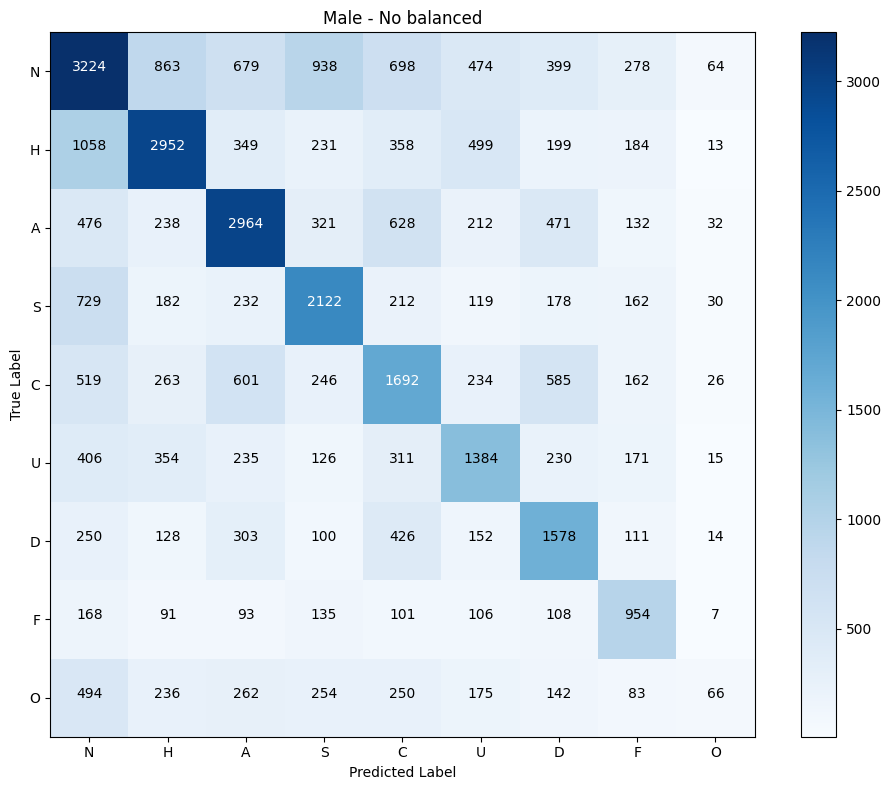

In [24]:
import matplotlib.pyplot as plt
import numpy as np

labels = label2id.keys()
conf_matrix = preds_metrics['test_confusion_matrix']


# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Male - No balanced")
plt.colorbar()

# Agregar etiquetas
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Rótulos de valores dentro de cada celda
conf_matrix = np.array(conf_matrix)

# Calcular el umbral
thresh = conf_matrix.max() / 2
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(
        j, i, format(conf_matrix[i, j], 'd'),
        horizontalalignment="center",
        color="white" if conf_matrix[i, j] > thresh else "black"
    )

# Etiquetas de los ejes
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()